In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\\Work\\PG Programe\\Linear Regression Model Building\\day.csv")

In [3]:
df.head(-1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,725,26-12-2019,1,1,12,0,3,1,3,9.976653,11.01665,82.3333,21.208582,9,432,441
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341


In [4]:
df.mnth.value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
df.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

<Figure size 1500x3000 with 0 Axes>

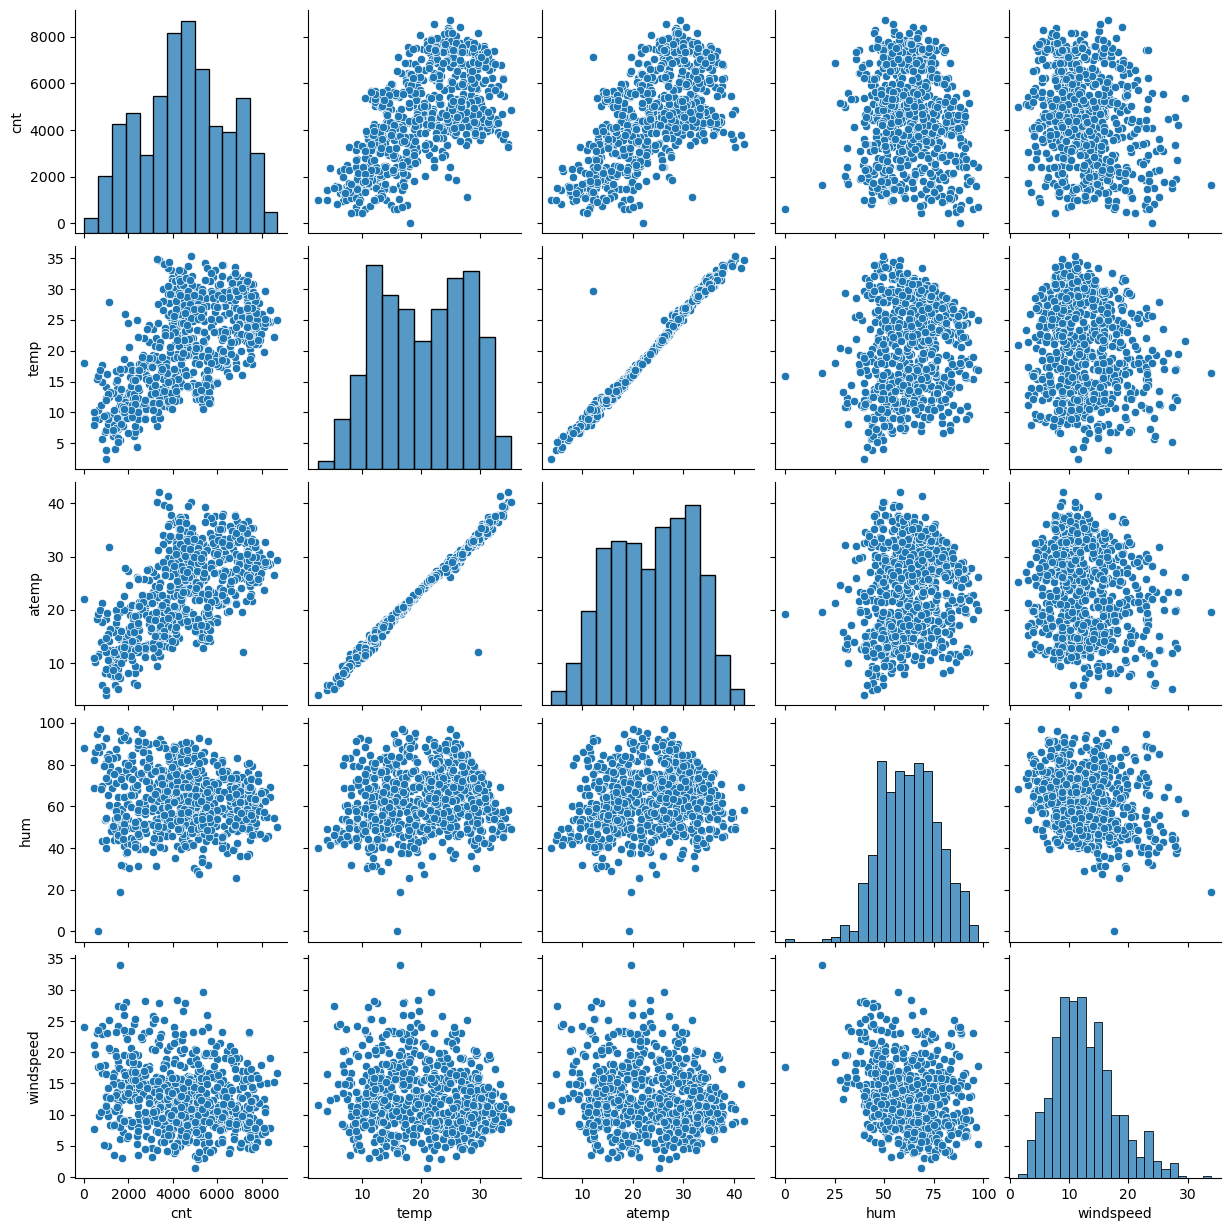

In [14]:
plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

In [9]:
## Dropping columns which are not necessary
df.drop(['dteday'],axis=1,inplace=True)
df.drop(['instant'],axis=1,inplace=True)
df.drop(['casual'],axis=1,inplace=True)
df.drop(['registered'],axis=1,inplace=True)

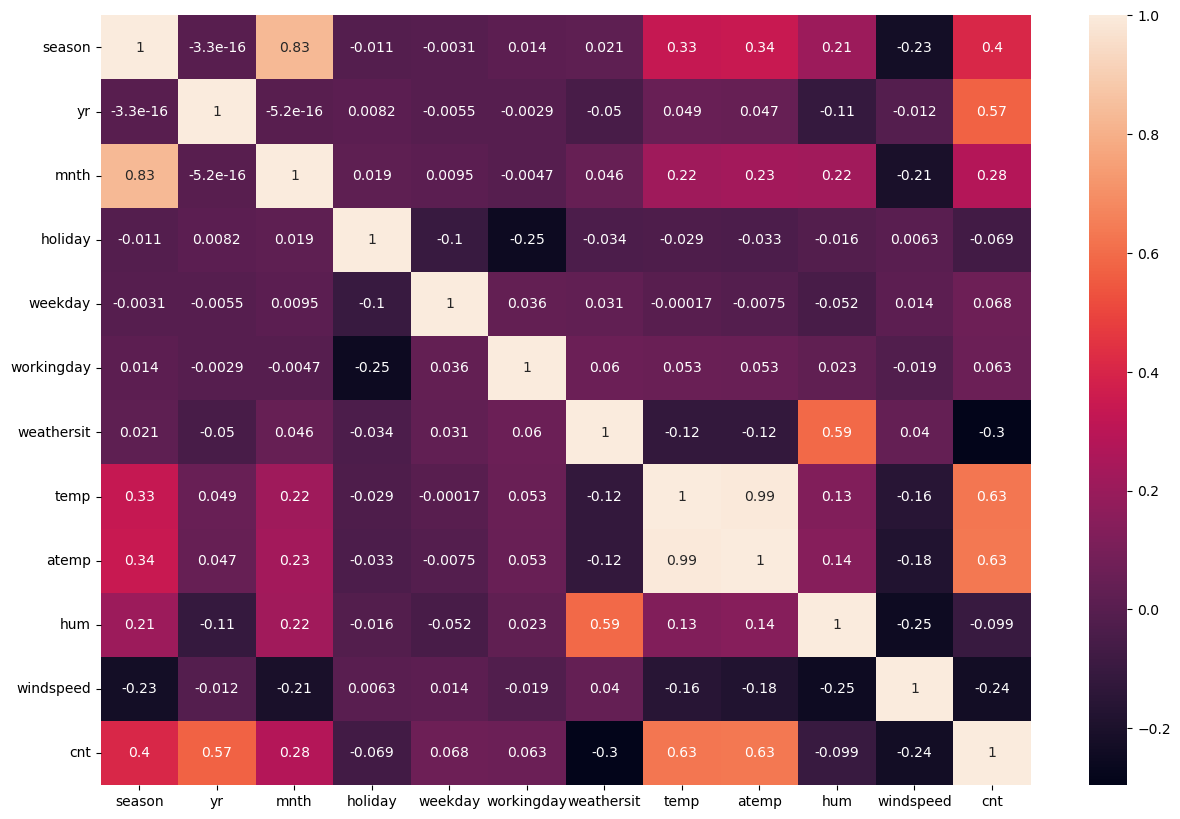

In [10]:
## From the above graphs, atemp are multi-collinear and high correlation 
## Heat Map showing the correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [11]:
#Mapping values
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)
df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


<Axes: xlabel='weathersit', ylabel='cnt'>

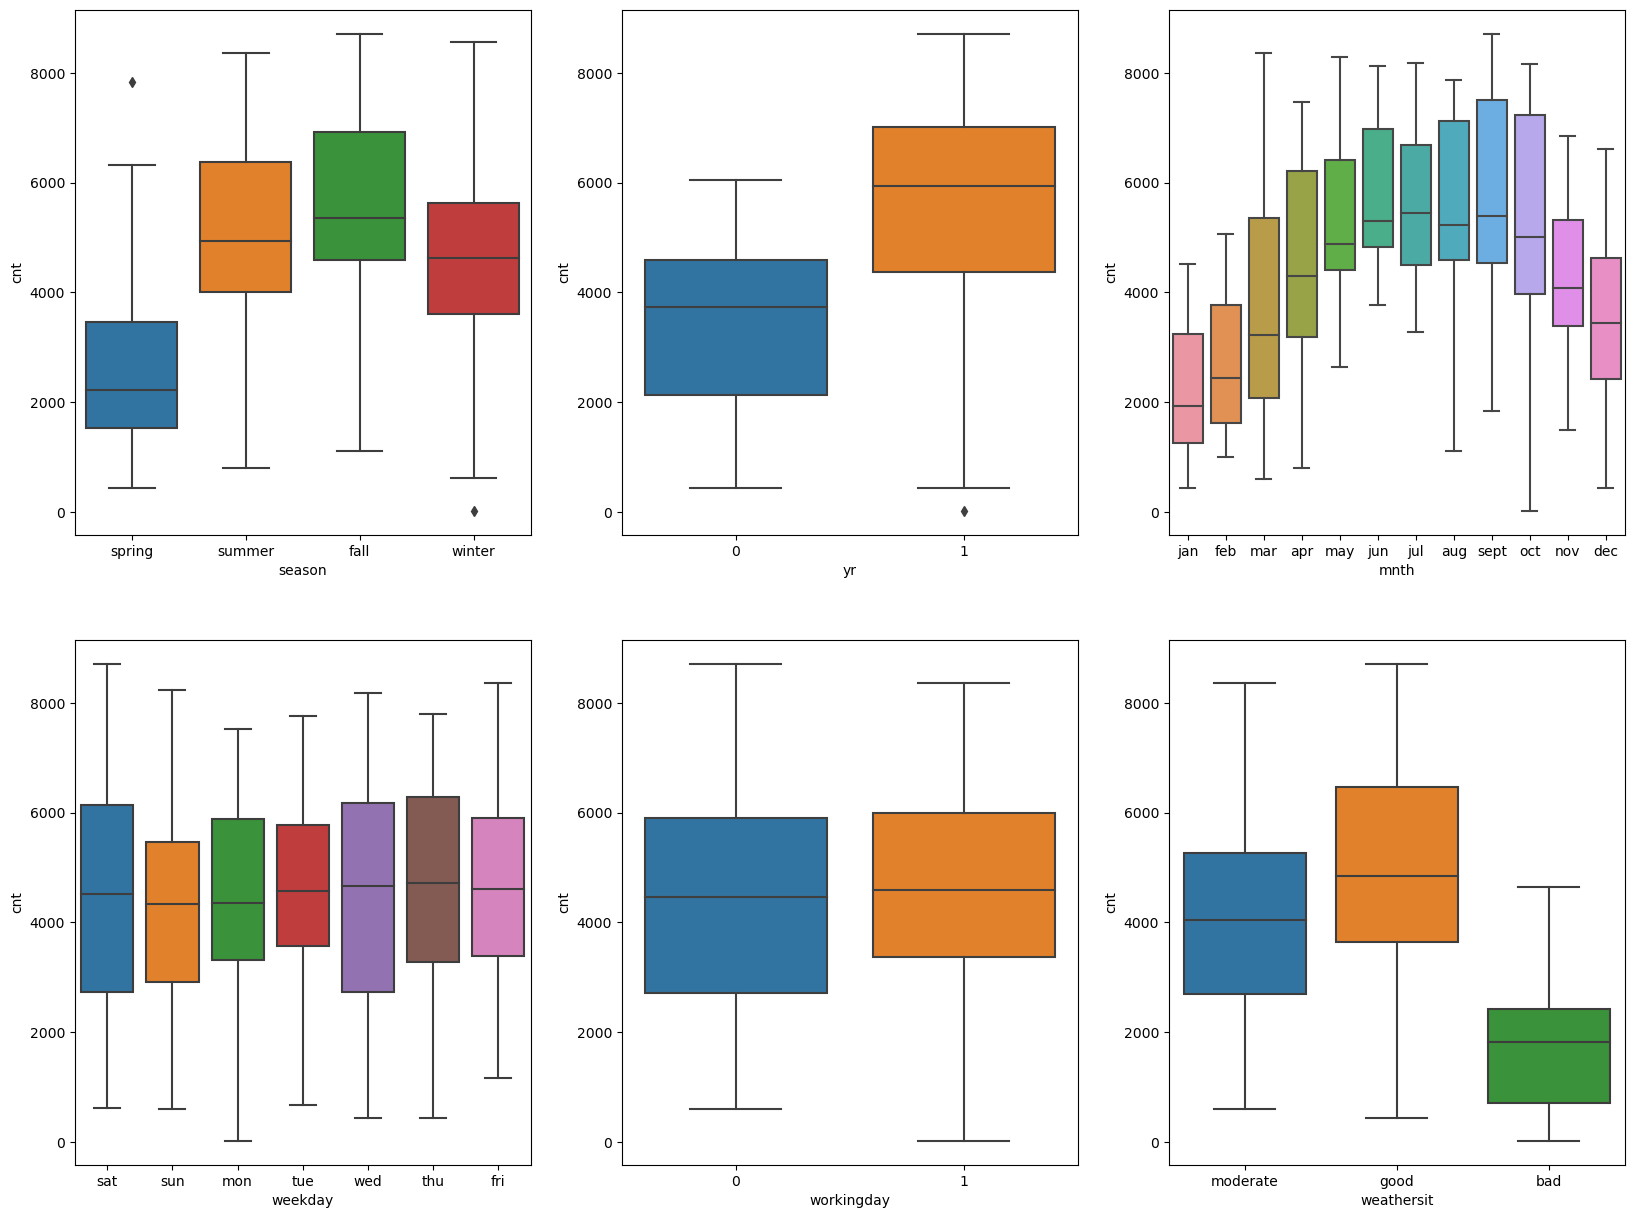

In [13]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=df)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=df)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=df)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=df)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=df)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=df)

In [14]:
df.weathersit.value_counts()

weathersit
good        463
moderate    246
bad          21
Name: count, dtype: int64

In [15]:
## Create dummies for the below mentioned columns
df = pd.get_dummies(data=df,columns=["season","mnth","weekday","weathersit"],drop_first=True,dtype='int32')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_spring        730 non-null    int32  
 9   season_summer        730 non-null    int32  
 10  season_winter        730 non-null    int32  
 11  mnth_aug             730 non-null    int32  
 12  mnth_dec             730 non-null    int32  
 13  mnth_feb             730 non-null    int32  
 14  mnth_jan             730 non-null    int32  
 15  mnth_jul             730 non-null    int

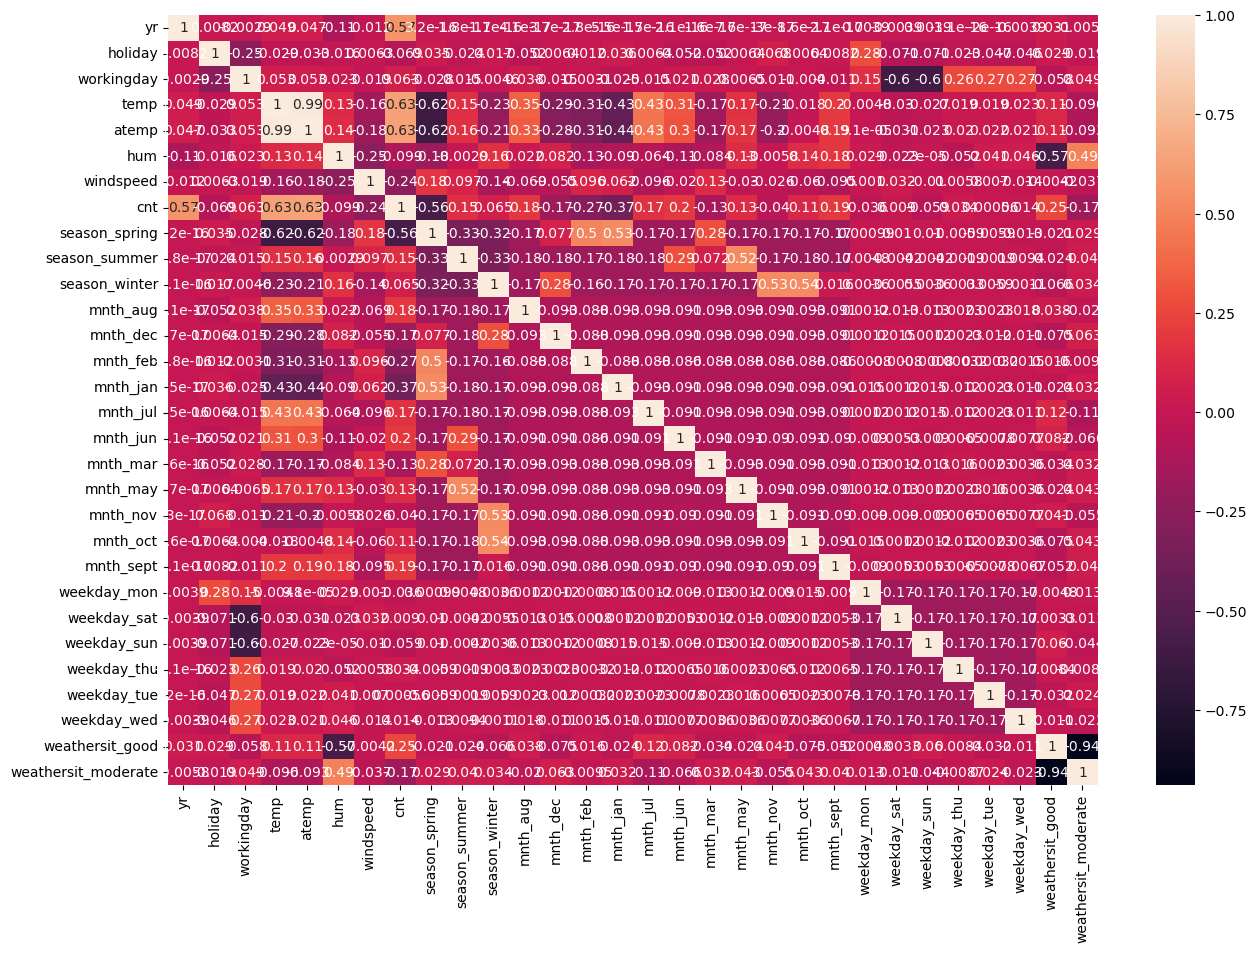

In [17]:
## Heat Map showing the correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [18]:
## Splitting the train set and test set - before applying the applying the minMax scaling for the above num_vars
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [19]:
y_train = df_train.pop('cnt')
X_train = df_train

In [20]:
y_test = df_test.pop('cnt')
X_test = df_test

In [21]:
#Use Normalized scaler to scale
num_vars = ['temp','atemp','hum','windspeed']
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [22]:
## Create the linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [23]:
## Recursive feature elimination to figure out which features to be selected.
rfe = RFE(lm,n_features_to_select=15) # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 12),
 ('mnth_mar', False, 13),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 14),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 15),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [24]:
## print the columns of the X_train
#X_train.columns
print(y_train)

653    7534
576    7216
426    4066
728    1796
482    4220
       ... 
526    6664
578    7261
53     1917
350    2739
79     2077
Name: cnt, Length: 510, dtype: int64


In [26]:
### Building model using statsmodel, for the detailed statistics
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [27]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [28]:
## Model - 1 - with only 1 from RFE
model1_cols = ['yr','holiday','workingday','temp',
'hum','windspeed','season_spring', 
'season_summer','season_winter',
'mnth_jan','mnth_jul', 
'mnth_sept', 'weekday_sat',
'weathersit_good','weathersit_moderate']

build_model(model1_cols)
get_vif(model1_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.31e-191
Time:                        22:26:17   Log-Likelihood:                -4105.9
No. Observations:                 510   AIC:                             8244.
Df Residuals:                     494   BIC:                             8312.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  41.6828    

In [29]:
## Model - 2 - with only 1 from RFE and Removed hum
model2_cols = ['yr','holiday','workingday','temp',
'windspeed','season_spring', 
'season_summer','season_winter',
'mnth_jan','mnth_jul', 
'mnth_sept', 'weekday_sat',
'weathersit_good','weathersit_moderate']
build_model(model2_cols)
get_vif(model2_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          7.33e-189
Time:                        22:26:22   Log-Likelihood:                -4114.6
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     495   BIC:                             8323.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1004.2126    

In [30]:
## In model-3, p-values are good and vif are within range, removing temp, is causing a singnificant decrease in the Adjusted R2, hence using the above model as the final one
## Model-4 - with only model3  - temp 
model4_cols = ['yr','holiday','workingday',
'windspeed','season_spring', 
'season_summer','season_winter',
'mnth_jan','mnth_jul', 
'mnth_sept', 'weekday_sat',
'weathersit_moderate']
build_model(model4_cols)
get_vif(model4_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     112.6
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          3.41e-133
Time:                        22:26:25   Log-Likelihood:                -4252.4
No. Observations:                 510   AIC:                             8531.
Df Residuals:                     497   BIC:                             8586.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4786.6728    

In [31]:
## Model-3 - with only model2  - weathersit_good 
model3_cols = ['yr','holiday','workingday','temp',
'windspeed','season_spring', 
'season_summer','season_winter',
'mnth_jan','mnth_jul', 
'mnth_sept', 'weekday_sat',
'weathersit_moderate']
build_model(model3_cols)
get_vif(model3_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.51e-162
Time:                        22:26:32   Log-Likelihood:                -4180.0
No. Observations:                 510   AIC:                             8388.
Df Residuals:                     496   BIC:                             8447.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1456.1238    

## Selected model - Model 3

In [32]:
## Create the linear regression model
X_train_sm = sm.add_constant(X_train[model3_cols])
lm = sm.OLS(y_train, X_train_sm).fit()

In [33]:
y_train_pred = lm.predict(X_train_sm)

In [34]:
y_train_pred

653    6171.931252
576    6467.715274
426    4390.095631
728    3050.823054
482    5167.916797
          ...     
526    6615.913808
578    7247.460197
53     2016.094528
350    2268.993714
79     2715.108669
Length: 510, dtype: float64

Text(0.5, 0, 'Errors')

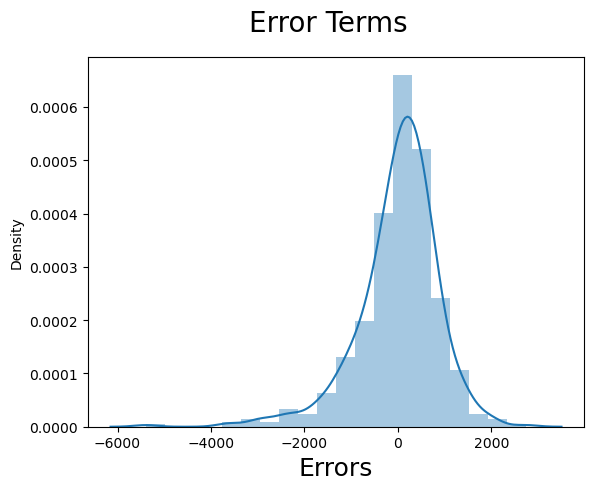

In [35]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [36]:
# Calculating the r-square
from sklearn.metrics import r2_score,mean_squared_error
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.7975337749845399

In [37]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

### Evaluating the model based on the test set

In [38]:
 X_test_sm = sm.add_constant(X_test[model3_cols])


In [39]:
y_test_pred = lm.predict(X_test_sm)

Text(0.5, 0, 'Errors')

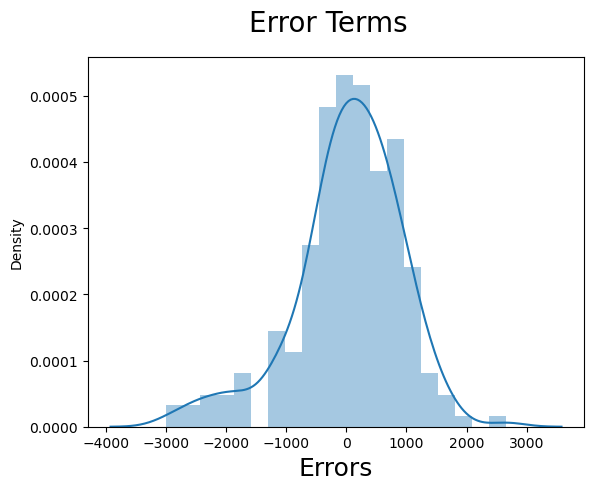

In [40]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)        

In [41]:
r2_score(y_test,y_test_pred)

0.7768237283301282